In [1]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
!pip install numpy matplotlib pandas scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import preprocessing

In [5]:
preprocessing.hello()

Hello from preprocessing


In [7]:
# nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
nba = preprocessing.get_cleaned_baseline_data('../data/cleaned_data/base_cleaned.csv')
nba

,playerName,seasonStartYear,salary,inflationAdjSalary,startYear,height,weight,MP,PTS,Age,...,POR,SAC,SAS,SEA,TOR,TOT,UTA,VAN,WAS,WSB
0,Michael Jordan,1996,30140000,52258566,1985.0,78.0,198.0,3090.0,2491.0,32.0,...,0,0,0,0,0,0,0,0,0,0
1,Horace Grant,1996,14857000,25759971,1988.0,82.0,215.0,2286.0,847.0,30.0,...,0,0,0,0,0,0,0,0,0,0
2,Reggie Miller,1996,11250000,19505934,1988.0,79.0,185.0,2621.0,1606.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,Shaquille O'Neal,1996,10714000,18576585,1993.0,85.0,325.0,1946.0,1434.0,23.0,...,0,0,0,0,0,0,0,0,0,0
4,Gary Payton,1996,10212000,17706187,1991.0,76.0,180.0,3162.0,1563.0,27.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,77250,85683,2015.0,82.0,237.0,135.0,63.0,25.0,...,0,0,0,0,0,0,0,0,0,0
10465,James Young,2017,77250,85683,2015.0,78.0,215.0,220.0,68.0,21.0,...,0,0,0,0,0,0,0,0,0,0
10471,Darrun Hilliard,2017,77250,85683,2016.0,78.0,205.0,381.0,127.0,23.0,...,0,0,0,0,0,0,0,0,0,0
10481,Jonathan Gibson,2017,74158,82253,2017.0,74.0,185.0,231.0,106.0,29.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:

nba = preprocessing.add_log_y_values(nba)
X_train, X_test, y_train, y_test = preprocessing.split_data(nba)

In [10]:
# Linear Rgeression model of the form y = w0 + w1x

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.41886071291927957, R2: 0.7348193303985696


Text(0.5, 1.0, 'Residual Plot for Linear Regression')

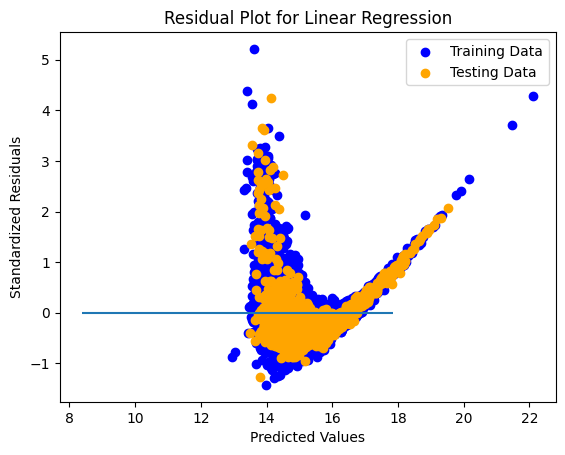

In [13]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Residual Plot for Linear Regression")

In [ ]:
#attempted scaling of all feautures vs taking the log of just the prices (target) and the latter gives better performance
from sklearn.preprocessing import MinMaxScaler

# X_train
# scaler = MinMaxScaler()
# numeric_vars = ['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']
# X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
# X_test[numeric_vars] = scaler.fit_transform(X_test[numeric_vars])
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)
# y_train

In [14]:

from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

#testing with number of features=11
rfe = RFE(lm, n_features_to_select=64)             
rfe = rfe.fit(X_train, y_train)

In [18]:
# list(zip(rfe.support_,rfe.ranking_))

In [19]:
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

0.7348193303985708


In [20]:
from sklearn.model_selection import GridSearchCV

hyper_params = [{'n_features_to_select': list(range(1, 65))}]


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [21]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
be = model_cv.best_score_
best_index = model_cv.best_index_

print("Best result:", be, "at index", best_index)

Best result: 0.7424425051851211 at index 62


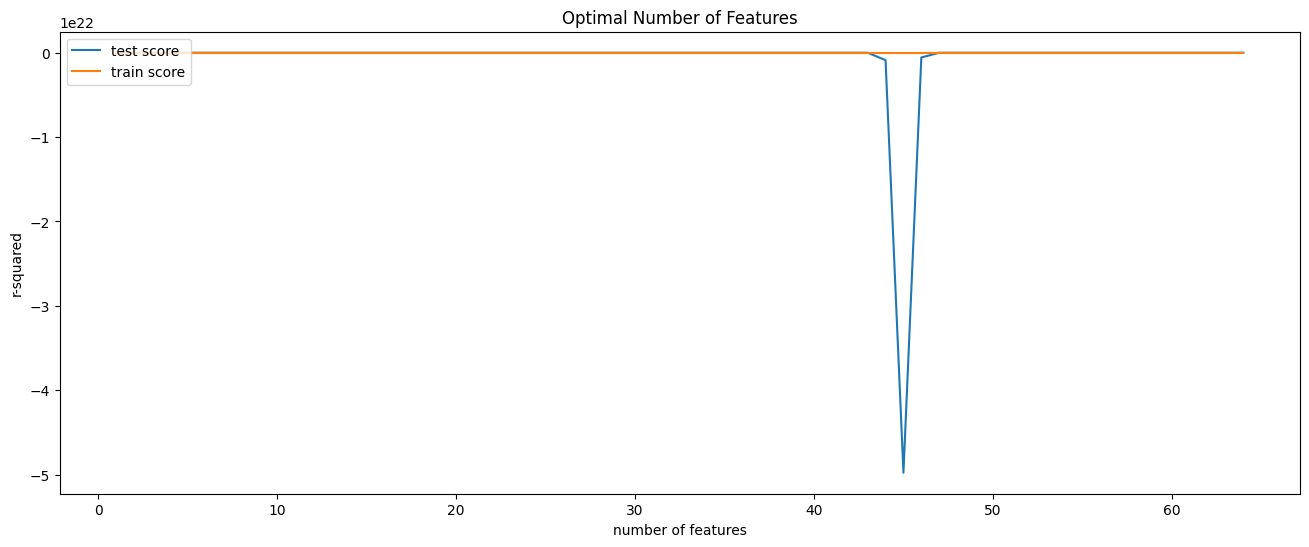

In [22]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [23]:
n_features_optimal = 64 #from graph above

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train,rfe.support_,rfe.ranking_))


[(array([1996, 30140000, 52258566, 1985.0, 78.0, 198.0, 3090.0, 2491.0,
         32.0, 82.0, 82.0, 29.4, 0.355, 352.0, 180.0, 543.0, 548.0, 111.0,
         916.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0], dtype=object),
  True,
  1),
 (array([1996, 14857000, 25759971, 1988.0, 82.0, 215.0, 2286.0, 847.0, 30.0,
         63.0, 62.0, 17.9, 0.306, 170.0, 62.0, 580.0, 152.0, 1.0, 347.0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0], dtype=object),
  True,
  1),
 (array([1996, 11250000, 19505934, 1988.0, 79.0, 185.0, 2621.0, 1606.0,
         30.0, 76.0, 76.0, 20.1, 0.467, 253.0, 77.0, 214.0, 430.0, 168.0,
         504.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         

In [24]:
# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
rms = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {MSE}, R2: {r2}, RMSE: {rms}, MAE: {mae}")

MSE: 0.4188607129192775, R2: 0.7348193303985708, RMSE: 0.6471944938882573, MAE: 0.42706125573815884


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform 
from scipy.stats import randint

parameters = {
                'alpha': uniform(0.00001, 0.001),
                'max_iter': randint(500, 1500),
                'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0': uniform(0.001,0.1)
            }
model = SGDRegressor()
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train.reshape((-1,)))
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=9.801101783558573e-05, eta0=0.02405806912372992,
             learning_rate='adaptive', max_iter=1421)

 The best score across ALL searched params:
 -4.256309787610644e+38

 The best parameters across ALL searched params:
 {'alpha': 9.801101783558573e-05, 'eta0': 0.02405806912372992, 'learning_rate': 'adaptive', 'max_iter': 1421}


In [28]:
sgdregressor = SGDRegressor(alpha=randm_src.best_params_['alpha'], max_iter=randm_src.best_params_['max_iter'],
                            learning_rate=randm_src.best_params_['learning_rate'], eta0=randm_src.best_params_['eta0'])
# sgdregressor = SGDRegressor()
# sgdregressor.fit(X_train, y_train.values.reshape((-1,)))  
# y_pred_sgd = sgdregressor.predict(X_test)

rfe = RFE(sgdregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train.reshape((-1,)))

y_pred_sgd = rfe.predict(X_test)

In [29]:
MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
rms_sgd = mean_squared_error(y_test, y_pred_sgd, squared=False)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print(f"MSE: {MSE_sgd}, R2: {r2_sgd}, RMSE: {rms_sgd}, MAE: {mae_sgd}")

MSE: 7.891680045304992e+38, R2: -4.996221737075451e+38, RMSE: 2.8092134211029594e+19, MAE: 1.947386945182852e+19


Text(0.5, 1.0, 'Residual Plot for SGDRegressor')

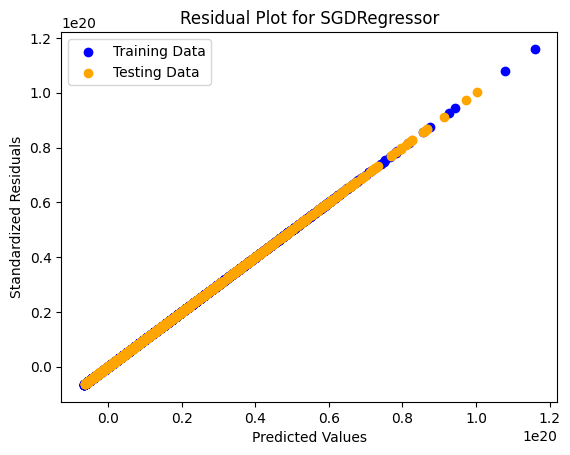

In [32]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for SGDRegressor")

In [34]:
from sklearn.linear_model import Lasso

parameters = {
                'alpha': uniform(0, 10)
             }
model = Lasso()
randm_src_lasso = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_lasso.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_lasso.best_params_)

lassoregressor = Lasso(alpha=randm_src_lasso.best_params_['alpha'])
# lassoregressor.fit(X_train, y_train)  
# y_pred_lasso = lassoregressor.predict(X_test)

rfe = RFE(lassoregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
y_pred_lasso = rfe.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rms_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"MSE: {MSE_lasso}, R2: {r2_lasso}, RMSE: {rms_lasso}, MAE: {mae_lasso}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+02, tolerance: 3.953e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+02, tolerance: 4.087e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+02, toleranc


 The best parameters across ALL searched params:
 {'alpha': 0.4532283277680871}
MSE: 0.43923381256340716, R2: 0.7219211233362912, RMSE: 0.6627471709207118, MAE: 0.4425600863582643


Text(0.5, 1.0, 'Residual Plot for Linear Model with L1 regularization')

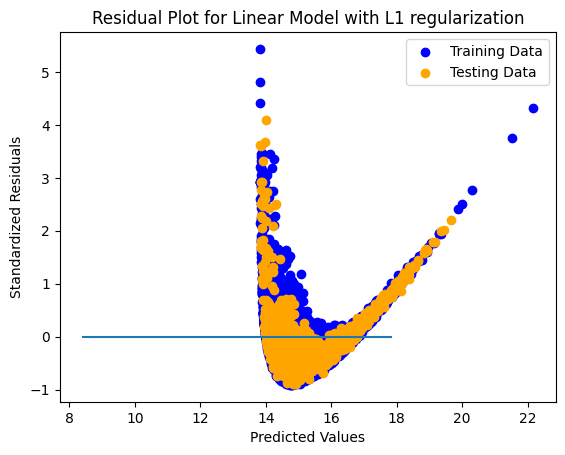

In [36]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for Linear Model with L1 regularization")

In [38]:
from sklearn.linear_model import Ridge

parameters = {
                'alpha': uniform(0, 10)
             }
model = Ridge()
randm_src_ridge = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_ridge.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_ridge.best_params_)

ridgeregressor = Ridge(alpha=randm_src_ridge.best_params_['alpha'])
# ridgeregressor.fit(X_train, y_train)  
# y_pred_ridge = ridgeregressor.predict(X_test)
rfe = RFE(ridgeregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
y_pred_ridge = rfe.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rms_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}, RMSE: {rms_ridge}, MAE: {mae_ridge}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.48349e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.85588e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30367e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.64909e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:21


 The best parameters across ALL searched params:
 {'alpha': 7.99601004923431}
MSE: 0.41858760466067707, R2: 0.734992235205958, RMSE: 0.6469834655234066, MAE: 0.42688673999693655


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.0231e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40471e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40471e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40471e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'Residual Plot for Linear Model with Ridge regularization')

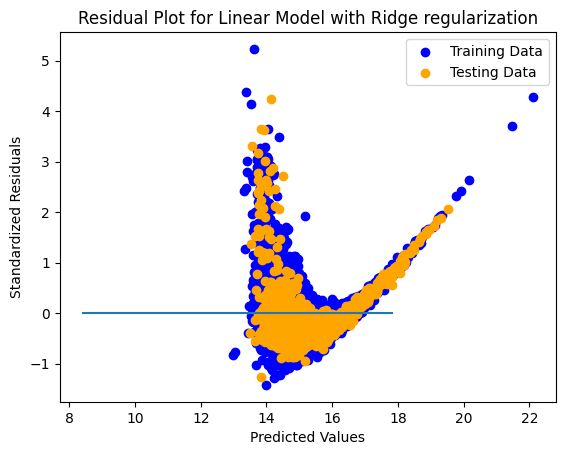

In [40]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for Linear Model with Ridge regularization")

In [41]:
from sklearn.linear_model import LassoCV

lassocvregressor = LassoCV()
lassocvregressor.fit(X_train, y_train)  
y_pred_lassocv = lassocvregressor.predict(X_test)

MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)
rms_lassocv = mean_squared_error(y_test, y_pred_lassocv, squared=False)
mae_lassocv = mean_absolute_error(y_test, y_pred_lassocv)

print(f"MSE: {MSE_lassocv}, R2: {r2_lassocv}, RMSE: {rms_lassocv}, MAE: {mae_lassocv}")

MSE: 0.5247585095603888, R2: 0.6677754474168365, RMSE: 0.7244021739064488, MAE: 0.48207120858191305


In [42]:
plt.scatter(lassocvregressor.predict(X_train), lassocvregressor.predict(X_train) - y_train.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassocvregressor.predict(X_test), lassocvregressor.predict(X_test) - y_test.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for LassoCV model")

AttributeError: 'numpy.ndarray' object has no attribute 'values'